# Version Benchmarking

In [ ]:
# Uncomment to install/upgrade ras-commander from pip
#!pip install --upgrade ras-commander

#Import the ras-commander package
from ras_commander import *

##### Optional Code Cell For Development/Testing Mode (Local Copy)
##### Uncomment and run this cell instead of the pip cell above

```python
# For Development Mode, add the parent directory to the Python path
import os
import sys
from pathlib import Path

current_file = Path(os.getcwd()).resolve()
rascmdr_directory = current_file.parent

# Use insert(0) instead of append() to give highest priority to local version
if str(rascmdr_directory) not in sys.path:
    sys.path.insert(0, str(rascmdr_directory))

print("Loading ras-commander from local dev copy")
from ras_commander import *
```

In [ ]:
import h5py
import numpy as np
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
from shapely.geometry import Point, LineString, Polygon
import xarray as xr
from pathlib import Path
import sys
from concurrent.futures import ThreadPoolExecutor, as_completed
import psutil
import platform
import cpuinfo

In [13]:
# Define versions to compare
versions = ['6.6', '6.5', '6.4.1', '6.3.1', '6.3', '6.2', "6.1", "6.0"] # NOTE: ras-commander does not support versions prior to 6.2 due to HDF5 file format changes

In [4]:
# Extract BaldEagleCrkMulti2D project
project_path = RasExamples.extract_project(["BaldEagleCrkMulti2D"])

2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - Found zip file: d:\GitHub\ras-commander\examples\Example_Projects_6_6.zip
2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - Loading project data from CSV...
2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - Loaded 68 projects from CSV.
2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - ----- RasExamples Extracting Project -----
2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - Extracting project 'BaldEagleCrkMulti2D'
2025-04-10 08:27:27 - ras_commander.RasExamples - INFO - Project 'BaldEagleCrkMulti2D' already exists. Deleting existing folder...
2025-04-10 08:27:28 - ras_commander.RasExamples - INFO - Existing folder for project 'BaldEagleCrkMulti2D' has been deleted.
2025-04-10 08:27:30 - ras_commander.RasExamples - INFO - Successfully extracted project 'BaldEagleCrkMulti2D' to d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D


In [5]:
# Init the ras_project with ras-commander to read all HEC-RAS project information 
init_ras_project(project_path, "6.5")
print(ras)
# If no ras object is defined in init_ras_project, it defaults to "ras" (useful for single project scripts)
# Display plan dataframe
ras.plan_df

2025-04-10 08:27:30 - ras_commander.RasPrj - INFO - Initializing global 'ras' object via init_ras_project function.
2025-04-10 08:27:30 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap
2025-04-10 08:27:30 - ras_commander.RasPrj - INFO - Project initialized. ras_object project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D


,plan_number,unsteady_number,geometry_number,Plan Title,Program Version,Short Identifier,Simulation Date,Computation Interval,Mapping Interval,Run HTab,...,DSS File,Friction Slope Method,UNET D2 SolverType,UNET D2 Name,HDF_Results_Path,Geom File,Geom Path,Flow File,Flow Path,full_path
0,13,07,06,PMF with Multi 2D Areas,5.10,PMF Multi 2D,"01JAN1999,1200,04JAN1999,1200",30SEC,30MIN,1,...,dss,1,Pardiso (Direct),193,None,06,d:\GitHub\ras-commander\examples\example_proje...,07,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
1,15,12,08,1d-2D Dambreak Refined Grid,5.10,1D-2D Refined Grid,"01JAN1999,1200,04JAN1999,1200",20SEC,5MIN,1,...,dss,1,NaN,BaldEagleCr,None,08,d:\GitHub\ras-commander\examples\example_proje...,12,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
2,17,09,10,2D to 1D No Dam,5.00,2D to 1D No Dam,"01JAN1999,1200,06JAN1999,1200",1MIN,5MIN,1,...,dss,1,NaN,Upstream2D,None,10,d:\GitHub\ras-commander\examples\example_proje...,09,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
3,18,10,11,2D to 2D Run,5.00,2D to 2D Run,"01JAN1999,1200,04JAN1999,1200",20SEC,5MIN,1,...,dss,1,NaN,BaldEagleCr,None,11,d:\GitHub\ras-commander\examples\example_proje...,10,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
4,19,11,12,SA to 2D Dam Break Run,5.00,SA to 2D Dam Break,"01JAN1999,1200,04JAN1999,1200",20SEC,10MIN,1,...,dss,1,NaN,BaldEagleCr,None,12,d:\GitHub\ras-commander\examples\example_proje...,11,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
5,03,13,09,Single 2D Area - Internal Dam Structure,5.04,Single 2D,"01JAN1999,1200,04JAN1999,1200",30SEC,10MIN,1,...,dss,1,NaN,BaldEagleCr,None,09,d:\GitHub\ras-commander\examples\example_proje...,13,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
6,04,01,13,SA to 2D Area Conn - 2D Levee Structure,5.00,2D Levee Struc,"01JAN1999,1200,04JAN1999,1200",20SEC,5MIN,1,...,dss,1,NaN,BaldEagleCr,None,13,d:\GitHub\ras-commander\examples\example_proje...,01,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
7,02,01,01,SA to Detailed 2D Breach,5.10,SA-2D Det Brch,"01JAN1999,1200,04JAN1999,1200",10SEC,5MIN,1,...,dss,1,Pardiso (Direct),BaldEagleCr,None,01,d:\GitHub\ras-commander\examples\example_proje...,01,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
8,01,01,01,SA to Detailed 2D Breach FEQ,5.03,SA-2D Det FEQ,"01JAN1999,1200,04JAN1999,1200",5SEC,5MIN,1,...,dss,1,NaN,BaldEagleCr,None,01,d:\GitHub\ras-commander\examples\example_proje...,01,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...
9,05,02,03,Single 2D area with Bridges FEQ,5.10,Single 2D Bridges FEQ,"01JAN1999,1200,04JAN1999,1200",5SEC,10MIN,-1,...,dss,1,PARDISO (Direct),BaldEagleCr,None,03,d:\GitHub\ras-commander\examples\example_proje...,02,d:\GitHub\ras-commander\examples\example_proje...,d:\GitHub\ras-commander\examples\example_proje...


In [6]:
# Export Plan Numbers to List and Print
plan_numbers = ras.plan_df['plan_number'].tolist()
print(plan_numbers)


['13', '15', '17', '18', '19', '03', '04', '02', '01', '05', '06']


In [7]:
# Define run_simulation function for
import time
from ras_commander import RasGeo

def run_simulation(version, plan_number):
    # Initialize project for the specific version
    ras_project = init_ras_project(project_path, str(version))
    
    # Clear geometry preprocessor files for the plan
    plan_path = RasPlan.get_plan_path(plan_number, ras_object=ras_project)
    RasGeo.clear_geompre_files(plan_path, ras_object=ras_project)
    
    # Set the number of cores to 4
    RasPlan.set_num_cores(plan_number, "4", ras_object=ras_project)
    
    # Update plan run flags – setting "Run HTab" flag to 1 to force geometry preprocessing
    RasPlan.update_run_flags(plan_number, {"Run HTab": 1}, ras_object=ras_project)
    
    # Compute the plan
    start_time = time.time()
    success = RasCmdr.compute_plan(plan_number, ras_object=ras_project)
    total_time = time.time() - start_time
    
    if success:
        # Get the HDF file path for the plan results
        hdf_path = RasPlan.get_results_path(plan_number, ras_object=ras_project)
        
        # Extract runtime data from the HDF file
        runtime_data = HdfResultsPlan.get_runtime_data(hdf_path)
        
        # Extract required information from the runtime data
        preprocessor_time = runtime_data['Preprocessing Geometry (hr)'].values[0]
        unsteady_compute_time = runtime_data['Unsteady Flow Computations (hr)'].values[0]
        
        # Get volume accounting data from the HDF file
        volume_accounting = HdfResultsPlan.get_volume_accounting(hdf_path)
        # Extract Error Percent from the DataFrame
        volume_error = volume_accounting['Error Percent'].values[0] if not volume_accounting.empty else None
        
        # Print the extracted data
        print(f"\nExtracted Data for Plan {plan_number} in Version {version}:")
        print(f"Preprocessor Time: {preprocessor_time:.3f} hr")
        print(f"Unsteady Compute Time: {unsteady_compute_time:.3f} hr") 
        print(f"Volume Error: {volume_error:.3f}%" if volume_error is not None else "Volume Error: None")
        print(f"Total Time: {total_time/3600:.3f} hr\n")
        
        return {
            'Version': version,
            'Plan': plan_number,
            'Preprocessor Time (hr)': preprocessor_time,
            'Unsteady Compute Time (hr)': unsteady_compute_time,
            'Volume Error (%)': volume_error,
            'Total Time (hr)': total_time / 3600  # convert seconds to hours
        }
    else:
        return None

In [8]:
# Select the plan number you want to run across all versions
plan_number = '02'  # Make sure this is a string and include the leading zero


In [10]:
# Run simulations for all versions with plan_number defined by user
results = []
for version in versions:
    print(f"Running simulation for Version {version}, Plan {plan_number}")
    result = run_simulation(version, plan_number) 
    if result is not None:  # Check if result is not None
        results.append(result)
        print(f"Completed: Version {version}, Plan {plan_number}")
    else:
        print(f"Failed: Version {version}, Plan {plan_number}")

# Create DataFrame from results
df = pd.DataFrame(results)

# Save initial results to CSV
df.to_csv('save_initial_results.csv', index=False)

print("Initial results saved to 'save_initial_results.csv'")


2025-04-11 08:55:43 - ras_commander.RasPrj - INFO - Initializing global 'ras' object via init_ras_project function.


Running simulation for Version 6.6, Plan 02


2025-04-11 08:55:44 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap
2025-04-11 08:55:44 - ras_commander.RasPrj - INFO - Project initialized. ras_object project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-11 08:55:44 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 08:55:44 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 08:55:44 - ras_commander.RasGeo - INFO - Geometry dataframe updated successfully.
2025-04-11 08:55:44 - ras_commander.RasUtils - INFO - Constructed plan file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
202


Extracted Data for Plan 02 in Version 6.6:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.697 hr
Volume Error: 0.007%
Total Time: 0.728 hr

Completed: Version 6.6, Plan 02
Running simulation for Version 6.5, Plan 02


2025-04-11 09:39:23 - ras_commander.RasPlan - INFO - Successfully updated run flags in plan file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 09:39:24 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-11 09:39:24 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-11 09:39:24 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.5\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02"
2025-04-11 10:19:24 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 10:19:24 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2400.73 seconds
2025-04-11 10:19:25 - ras_commander.HdfResultsPlan - INFO - Us


Extracted Data for Plan 02 in Version 6.5:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.644 hr
Volume Error: 0.005%
Total Time: 0.667 hr

Completed: Version 6.5, Plan 02
Running simulation for Version 6.4.1, Plan 02


2025-04-11 10:19:25 - ras_commander.RasPlan - INFO - Successfully updated run flags in plan file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 10:19:25 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-11 10:19:25 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-11 10:19:25 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.4.1\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02"
2025-04-11 10:55:45 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 10:55:45 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2180.50 seconds
2025-04-11 10:55:45 - ras_commander.HdfResultsPlan - INFO - 


Extracted Data for Plan 02 in Version 6.4.1:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.585 hr
Volume Error: 0.006%
Total Time: 0.606 hr

Completed: Version 6.4.1, Plan 02
Running simulation for Version 6.3.1, Plan 02


2025-04-11 11:33:29 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 11:33:29 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2263.88 seconds
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p02.hdf
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to Detailed 2D Breach
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-11 11:33:29 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commande


Extracted Data for Plan 02 in Version 6.3.1:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.608 hr
Volume Error: 0.006%
Total Time: 0.629 hr

Completed: Version 6.3.1, Plan 02
Running simulation for Version 6.3, Plan 02


2025-04-11 11:33:30 - ras_commander.RasCmdr - ERROR - Error message: 
2025-04-11 11:33:30 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 0.03 seconds
2025-04-11 11:33:30 - ras_commander.RasPrj - INFO - Initializing global 'ras' object via init_ras_project function.
2025-04-11 11:33:30 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap
2025-04-11 11:33:30 - ras_commander.RasPrj - INFO - Project initialized. ras_object project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-11 11:33:30 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 11:33:30 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagl

Failed: Version 6.3, Plan 02
Running simulation for Version 6.2, Plan 02


2025-04-11 12:07:43 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 12:07:43 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2052.68 seconds
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p02.hdf
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to Detailed 2D Breach
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-11 12:07:43 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commande


Extracted Data for Plan 02 in Version 6.2:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.549 hr
Volume Error: 0.006%
Total Time: 0.570 hr

Completed: Version 6.2, Plan 02
Running simulation for Version 6.1, Plan 02


2025-04-11 12:54:41 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 12:54:41 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2818.52 seconds
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p02.hdf
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to Detailed 2D Breach
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-11 12:54:41 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commande


Extracted Data for Plan 02 in Version 6.1:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.763 hr
Volume Error: 0.006%
Total Time: 0.783 hr

Completed: Version 6.1, Plan 02
Running simulation for Version 6.0, Plan 02


2025-04-11 12:54:42 - ras_commander.RasPlan - INFO - Successfully updated run flags in plan file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02
2025-04-11 12:54:42 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-11 12:54:42 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-11 12:54:42 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.0\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02"
2025-04-11 13:40:33 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-11 13:40:33 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2750.95 seconds
2025-04-11 13:40:33 - ras_commander.HdfResultsPlan - INFO - Us


Extracted Data for Plan 02 in Version 6.0:
Preprocessor Time: 0.000 hr
Unsteady Compute Time: 0.758 hr
Volume Error: 0.006%
Total Time: 0.764 hr

Completed: Version 6.0, Plan 02
Initial results saved to 'save_initial_results.csv'


2025-04-11 13:40:33 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-11 13:40:33 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-11 13:40:33 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-11 13:40:33 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


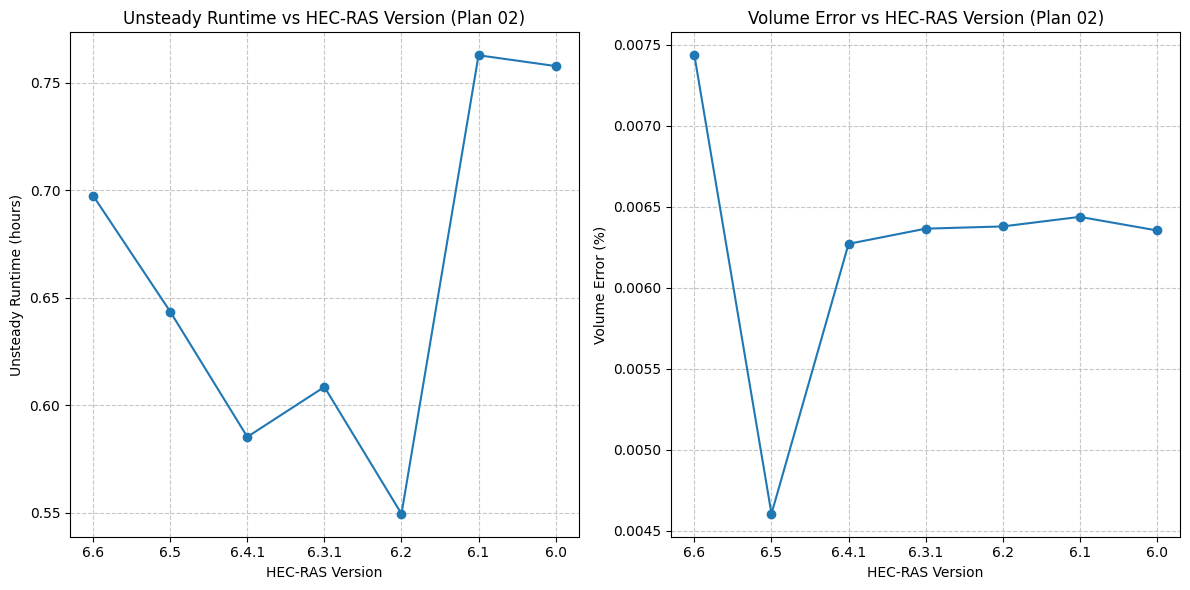

In [11]:
# Create line graphs
plt.figure(figsize=(12, 6))

# Unsteady Runtime vs Version
plt.subplot(1, 2, 1)
# Convert Version to categorical type to handle string versions properly
plt.plot(pd.Categorical(df['Version']), df['Unsteady Compute Time (hr)'], marker='o')
plt.title(f'Unsteady Runtime vs HEC-RAS Version (Plan {plan_number})')
plt.xlabel('HEC-RAS Version')
plt.ylabel('Unsteady Runtime (hours)')
plt.grid(True, linestyle='--', alpha=0.7)

# Volume Error vs Version
plt.subplot(1, 2, 2)
plt.plot(pd.Categorical(df['Version']), df['Volume Error (%)'], marker='o')
plt.title(f'Volume Error vs HEC-RAS Version (Plan {plan_number})')
plt.xlabel('HEC-RAS Version')
plt.ylabel('Volume Error (%)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

2025-04-10 08:27:31 - ras_commander.RasPrj - INFO - Initializing global 'ras' object via init_ras_project function.
2025-04-10 08:27:31 - ras_commander.RasMap - INFO - Successfully parsed RASMapper file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.rasmap
2025-04-10 08:27:31 - ras_commander.RasPrj - INFO - Project initialized. ras_object project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-10 08:27:31 - ras_commander.RasGeo - INFO - Clearing geometry preprocessor file for single plan: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p13
2025-04-10 08:27:31 - ras_commander.RasGeo - WARNING - No geometry preprocessor file found for: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p13
2025-04-10 08:27:31 - ras_commander.RasGeo - INFO - Geometry dataframe updated successfully.
2025-04-10 08:27:31 - ras_commander.RasUtils - INFO - Const

Running simulation for Version 6.6, Plan 13 with 2 cores


2025-04-10 08:27:31 - ras_commander.RasPlan - INFO - Successfully updated run flags in plan file: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p13
2025-04-10 08:27:31 - ras_commander.RasCmdr - INFO - Using ras_object with project folder: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D
2025-04-10 08:27:31 - ras_commander.RasCmdr - INFO - Running HEC-RAS from the Command Line:
2025-04-10 08:27:31 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p13"
2025-04-10 08:31:42 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 13
2025-04-10 08:31:42 - ras_commander.RasCmdr - INFO - Total run time for plan 13: 251.69 seconds
2025-04-10 08:31:42 - ras_commander.HdfResultsPlan - INFO - Usi

Completed: Plan 13 with 2 cores
Running simulation for Version 6.6, Plan 15 with 2 cores


2025-04-10 08:36:06 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 15
2025-04-10 08:36:06 - ras_commander.RasCmdr - INFO - Total run time for plan 15: 263.55 seconds
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p15.hdf
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p15.hdf
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p15.hdf
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Plan Name: 1d-2D Dambreak Refined Grid
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 08:36:06 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-comman

Completed: Plan 15 with 2 cores
Running simulation for Version 6.6, Plan 17 with 2 cores


2025-04-10 08:36:06 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p17"
2025-04-10 08:40:04 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 17
2025-04-10 08:40:04 - ras_commander.RasCmdr - INFO - Total run time for plan 17: 237.88 seconds
2025-04-10 08:40:04 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p17.hdf
2025-04-10 08:40:04 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p17.hdf
2025-04-10 08:40:04 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p17.hdf
2025-04

Completed: Plan 17 with 2 cores
Running simulation for Version 6.6, Plan 18 with 2 cores


2025-04-10 08:41:20 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 18
2025-04-10 08:41:20 - ras_commander.RasCmdr - INFO - Total run time for plan 18: 75.89 seconds
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p18.hdf
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p18.hdf
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p18.hdf
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Plan Name: 2D to 2D Run
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 08:41:20 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\exa

Completed: Plan 18 with 2 cores
Running simulation for Version 6.6, Plan 19 with 2 cores


2025-04-10 08:42:23 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 19
2025-04-10 08:42:23 - ras_commander.RasCmdr - INFO - Total run time for plan 19: 62.23 seconds
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p19.hdf
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p19.hdf
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p19.hdf
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to 2D Dam Break Run
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 08:42:23 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\ex

Completed: Plan 19 with 2 cores
Running simulation for Version 6.6, Plan 03 with 2 cores


2025-04-10 08:47:06 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 03
2025-04-10 08:47:06 - ras_commander.RasCmdr - INFO - Total run time for plan 03: 283.12 seconds
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03.hdf
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p03.hdf
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p03.hdf
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Plan Name: Single 2D Area - Internal Dam Structure
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 08:47:06 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHu

Completed: Plan 03 with 2 cores
Running simulation for Version 6.6, Plan 04 with 2 cores


2025-04-10 08:52:56 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 04
2025-04-10 08:52:56 - ras_commander.RasCmdr - INFO - Total run time for plan 04: 349.75 seconds
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p04.hdf
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p04.hdf
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p04.hdf
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to 2D Area Conn - 2D Levee Structure
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 08:52:56 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHu

Completed: Plan 04 with 2 cores
Running simulation for Version 6.6, Plan 02 with 2 cores


2025-04-10 09:35:01 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 02
2025-04-10 09:35:01 - ras_commander.RasCmdr - INFO - Total run time for plan 02: 2525.09 seconds
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p02.hdf
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p02.hdf
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to Detailed 2D Breach
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 09:35:01 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commande

Completed: Plan 02 with 2 cores
Running simulation for Version 6.6, Plan 01 with 2 cores


2025-04-10 11:50:02 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 01
2025-04-10 11:50:02 - ras_commander.RasCmdr - INFO - Total run time for plan 01: 8100.80 seconds
2025-04-10 11:50:02 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p01.hdf
2025-04-10 11:50:03 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p01.hdf
2025-04-10 11:50:03 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p01.hdf
2025-04-10 11:50:03 - ras_commander.HdfResultsPlan - INFO - Plan Name: SA to Detailed 2D Breach FEQ
2025-04-10 11:50:03 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 72.0
2025-04-10 11:50:03 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-comm

Completed: Plan 01 with 2 cores
Running simulation for Version 6.6, Plan 05 with 2 cores


2025-04-10 11:50:03 - ras_commander.RasCmdr - INFO - Running command: "C:\Program Files (x86)\HEC\HEC-RAS\6.6\Ras.exe" -c "D:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.prj" "d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p05"
2025-04-10 12:45:53 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 05
2025-04-10 12:45:53 - ras_commander.RasCmdr - INFO - Total run time for plan 05: 3350.66 seconds
2025-04-10 12:45:53 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p05.hdf
2025-04-10 12:45:53 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p05.hdf
2025-04-10 12:45:53 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p05.hdf
2025-0

Completed: Plan 05 with 2 cores
Running simulation for Version 6.6, Plan 06 with 2 cores


2025-04-10 12:52:53 - ras_commander.RasCmdr - INFO - HEC-RAS execution completed for plan: 06
2025-04-10 12:52:53 - ras_commander.RasCmdr - INFO - Total run time for plan 06: 419.02 seconds
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p06.hdf
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Final validated HDF file path: d:\GitHub\ras-commander\examples\example_projects\BaldEagleCrkMulti2D\BaldEagleDamBrk.p06.hdf
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Extracting Plan Information from: BaldEagleDamBrk.p06.hdf
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Plan Name: Gridded Precip - Infiltration
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Simulation Duration (hours): 120.0
2025-04-10 12:52:53 - ras_commander.HdfResultsPlan - INFO - Using HDF file from direct string path: d:\GitHub\ras-com

Completed: Plan 06 with 2 cores


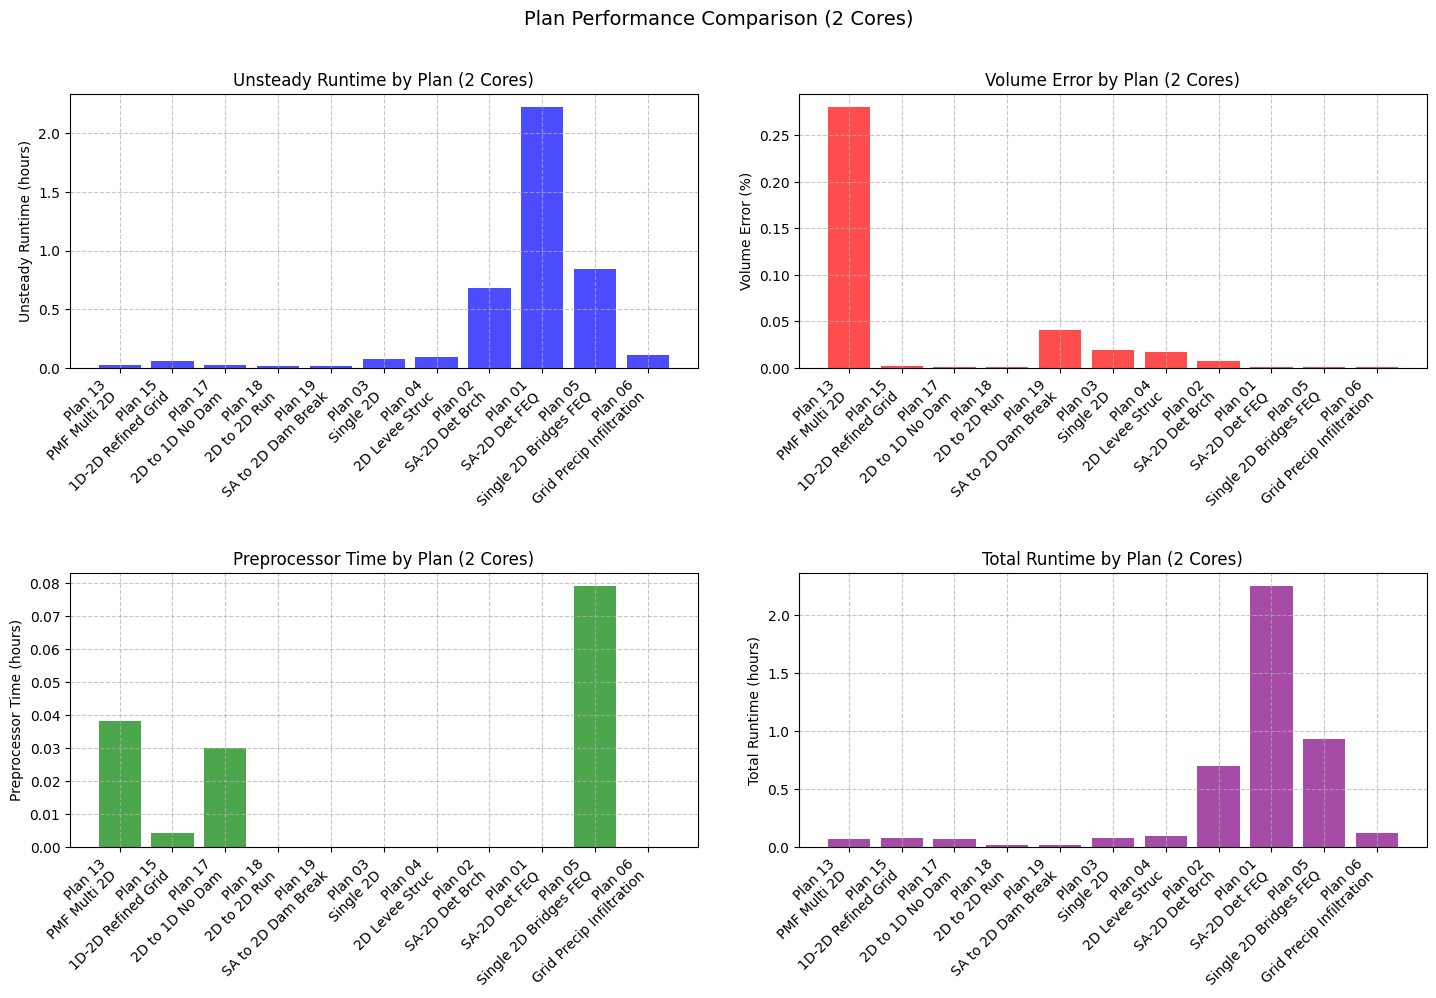

Results saved to 'hecras_plan_comparison_2core.csv'

Summary Statistics (2 Cores):
       Preprocessor Time (hr)  Unsteady Compute Time (hr)  Volume Error (%)  \
count               11.000000                   11.000000         11.000000   
mean                 0.013817                    0.378679          0.033688   
std                  0.025619                    0.677487          0.082888   
min                  0.000026                    0.014466          0.000331   
25%                  0.000030                    0.025326          0.001145   
50%                  0.000031                    0.071667          0.001792   
75%                  0.017129                    0.393609          0.017761   
max                  0.079262                    2.228099          0.280763   

       Total Time (hr)  
count        11.000000  
mean          0.402026  
std           0.684730  
min           0.017300  
25%           0.068008  
50%           0.078656  
75%           0.408916  
max  

In [9]:
# Benchmark all plans with 2 cores in HEC-RAS 6.6
results_2core = []

# Loop through each plan number
for plan in plan_numbers:
    print(f"Running simulation for Version 6.6, Plan {plan} with 2 cores")
    
    # Initialize project for 6.6
    ras_project = init_ras_project(project_path, "6.6")
    
    # Clear geometry preprocessor files
    plan_path = RasPlan.get_plan_path(plan, ras_object=ras_project)
    RasGeo.clear_geompre_files(plan_path, ras_object=ras_project)
    
    # Set number of cores to 2
    RasPlan.set_num_cores(plan, "2", ras_object=ras_project)
    
    # Update plan run flags
    RasPlan.update_run_flags(plan, {"Run HTab": 1}, ras_object=ras_project)
    
    # Compute the plan
    start_time = time.time()
    success = RasCmdr.compute_plan(plan, ras_object=ras_project)
    total_time = time.time() - start_time
    
    if success:
        # Get HDF file path
        hdf_path = RasPlan.get_results_path(plan, ras_object=ras_project)
        
        # Extract runtime data
        runtime_data = HdfResultsPlan.get_runtime_data(hdf_path)
        preprocessor_time = runtime_data['Preprocessing Geometry (hr)'].values[0]
        unsteady_compute_time = runtime_data['Unsteady Flow Computations (hr)'].values[0]
        
        # Get volume accounting
        volume_accounting = HdfResultsPlan.get_volume_accounting(hdf_path)
        volume_error = volume_accounting['Error Percent'].values[0] if not volume_accounting.empty else None
        
        result = {
            'Plan': plan,
            'Preprocessor Time (hr)': preprocessor_time,
            'Unsteady Compute Time (hr)': unsteady_compute_time,
            'Volume Error (%)': volume_error,
            'Total Time (hr)': total_time / 3600
        }
        results_2core.append(result)
        print(f"Completed: Plan {plan} with 2 cores")
    else:
        print(f"Failed: Plan {plan} with 2 cores")

# Convert results to DataFrame
df_2core = pd.DataFrame(results_2core)

# Get plan titles from ras.plan_df and merge with results
plan_titles = pd.DataFrame({
    'Plan': ras.plan_df['plan_number'].str.zfill(2),
    'Short Identifier': ras.plan_df['Short Identifier']
})
df_2core['Plan'] = df_2core['Plan'].astype(str).str.zfill(2)
df_2core = df_2core.merge(plan_titles, on='Plan', how='left')

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Unsteady Runtime
plt.subplot(2, 2, 1)
bars = plt.bar(range(len(df_2core)), df_2core['Unsteady Compute Time (hr)'], color='blue', alpha=0.7)
plt.title('Unsteady Runtime by Plan (2 Cores)', fontsize=12)
plt.ylabel('Unsteady Runtime (hours)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(len(df_2core)), [f"Plan {plan}\n{title}" for plan, title in zip(df_2core['Plan'], df_2core['Short Identifier'])], rotation=45, ha='right')

# Plot 2: Volume Error
plt.subplot(2, 2, 2)
plt.bar(range(len(df_2core)), df_2core['Volume Error (%)'], color='red', alpha=0.7)
plt.title('Volume Error by Plan (2 Cores)', fontsize=12)
plt.ylabel('Volume Error (%)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(len(df_2core)), [f"Plan {plan}\n{title}" for plan, title in zip(df_2core['Plan'], df_2core['Short Identifier'])], rotation=45, ha='right')

# Plot 3: Preprocessor Time
plt.subplot(2, 2, 3)
plt.bar(range(len(df_2core)), df_2core['Preprocessor Time (hr)'], color='green', alpha=0.7)
plt.title('Preprocessor Time by Plan (2 Cores)', fontsize=12)
plt.ylabel('Preprocessor Time (hours)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(len(df_2core)), [f"Plan {plan}\n{title}" for plan, title in zip(df_2core['Plan'], df_2core['Short Identifier'])], rotation=45, ha='right')

# Plot 4: Total Runtime
plt.subplot(2, 2, 4)
plt.bar(range(len(df_2core)), df_2core['Total Time (hr)'], color='purple', alpha=0.7)
plt.title('Total Runtime by Plan (2 Cores)', fontsize=12)
plt.ylabel('Total Runtime (hours)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(len(df_2core)), [f"Plan {plan}\n{title}" for plan, title in zip(df_2core['Plan'], df_2core['Short Identifier'])], rotation=45, ha='right')

plt.tight_layout(pad=3.0)
plt.suptitle('Plan Performance Comparison (2 Cores)', fontsize=14, y=1.02)
plt.show()

# Save results to CSV
df_2core.to_csv('hecras_plan_comparison_2core.csv', index=False)
print("Results saved to 'hecras_plan_comparison_2core.csv'")

# Display summary statistics
print("\nSummary Statistics (2 Cores):")
print(df_2core.describe())